## Purspose:
The intention of this file is to explore the effect of different paramters on the reward shape. It is often important to consider the tradeoff between temperature improvement and power savings.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

import gym_energyplus
from gym_energyplus import wrappers
import eval.reward_eval_tools

# Warning
Can't directly compare the derivative.

What we want to compare is for a change in temerature, how much does that effect the reward, and how much does the power usage need to change to balance this out

To do that - need to compare over an interval
e.g drop in reward from 24.5 to 25 ~.133 which is way different to the derivative
would need to use derivative * run (but that is pointless because we can calcuate the actual.

### Define the reward params and fundtion

In [2]:

rew_params =  {
            "temperature_center": 23.5,
            "temperature_tolerance": .5,
            "temperature_gaussian_weight": 0.1,
            "temperature_gaussian_sharpness": 0,
            "temperature_trapezoid_weight": 0.3,
            "hvac_power_weight": 0.0005
        }
def rew( t,p):
    return wrappers.compute_reward_common([t,t], [p], **rew_params)



### evaluae the effect of temperature and score

In [3]:
rew(22.5,0)

(-0.04999999999999999, (0.1, -0.15, 0.0, 0.0))

In [4]:
rew(23.5,-50)

(0.125, (0.1, 0.0, 0.0, 0.025))

In [5]:
rew(23.5,0)

(0.1, (0.1, 0.0, 0.0, 0.0))

In [6]:
rew(24,-60)

(0.13, (0.1, 0.0, 0.0, 0.03))

In [7]:
rew(24,0)

(0.1, (0.1, 0.0, 0.0, 0.0))

In [8]:
rew(24.5,-300)

(0.1, (0.1, -0.15, 0.0, 0.15))

In [9]:
print(rew(24.5,0))
print(rew(25,-300))

(-0.04999999999999999, (0.1, -0.15, 0.0, 0.0))
(-0.04999999999999999, (0.1, -0.3, 0.0, 0.15))


### Plot the reward shape

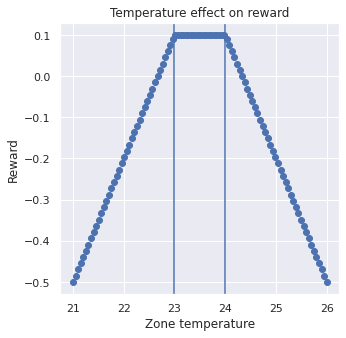

In [10]:
xs = list(np.linspace(21,26,num = 100))
ys = [rew(x,0)[0] for x in xs ]
plt.figure(figsize = (5,5))
plt.title("Temperature effect on reward")
plt.xlabel("Zone temperature")
plt.ylabel("Reward")
plt.plot(xs, ys, 'o')
#plt.plot(x,z)
plt.axvline(24, -1,1)
plt.axvline(23, -1,1)
plt.show()